In [1]:
from IPython.display import display

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

import mglearn

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

from sklearn.datasets import load_iris

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import QuantileTransformer, StandardScaler

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


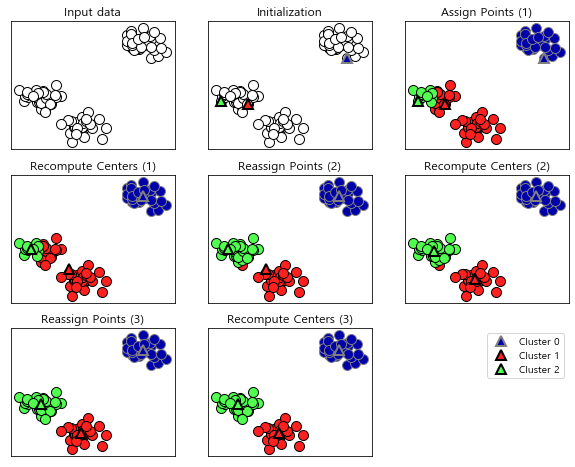

In [2]:
mglearn.plots.plot_kmeans_algorithm()

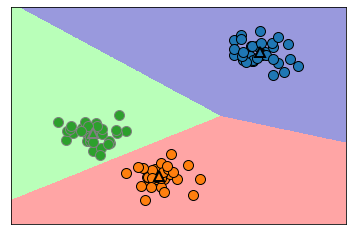

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [5]:
# 인위적으로 2차원 데이터를 생선한다.
X, y = make_blobs(random_state=1)

# 군집 모델을 만든다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print('클러스터 레이블:\n{}'.format(kmeans.labels_))

클러스터 레이블:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [7]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


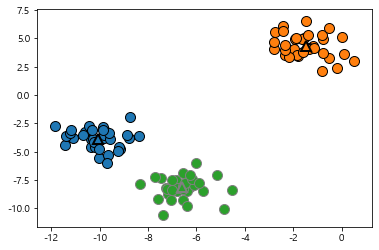

In [8]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    markers='^', markeredgewidth=2)

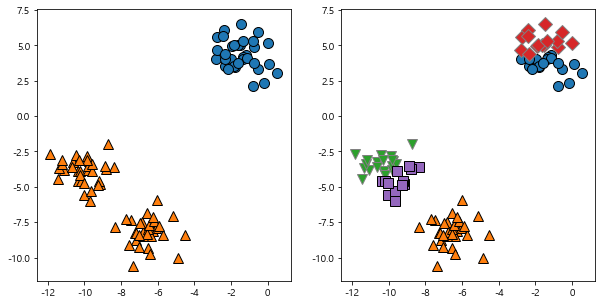

In [9]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

# 두 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters =2)
kmeans.fit(X)
assignments =kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용한다.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax= axes[1])

Text(0, 0.5, '특성 1')

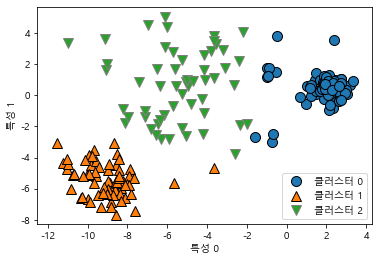

In [10]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0,2.5,0.5],
                               random_state = 170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc = 'best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

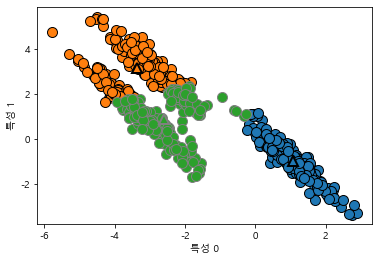

In [11]:
# 무작위로 클러스터 데이터를 생성한다.
X, y = make_blobs(random_state = 170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경한다.
transformation = rng.normal(size= (2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters =3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    markers='^', markeredgewidth=2)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

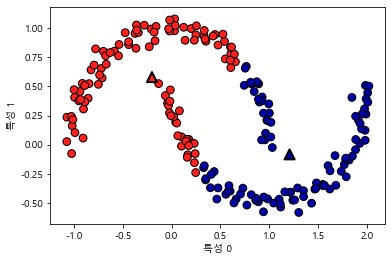

In [12]:
# tow_moons 데이터를 생선한다.
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise = 0.05, random_state = 0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터 할당과 클러스터 중심을 표시한다.
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = mglearn.cm2, s=60, edgecolors = 'k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth= 2, 
           edgecolors='k')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

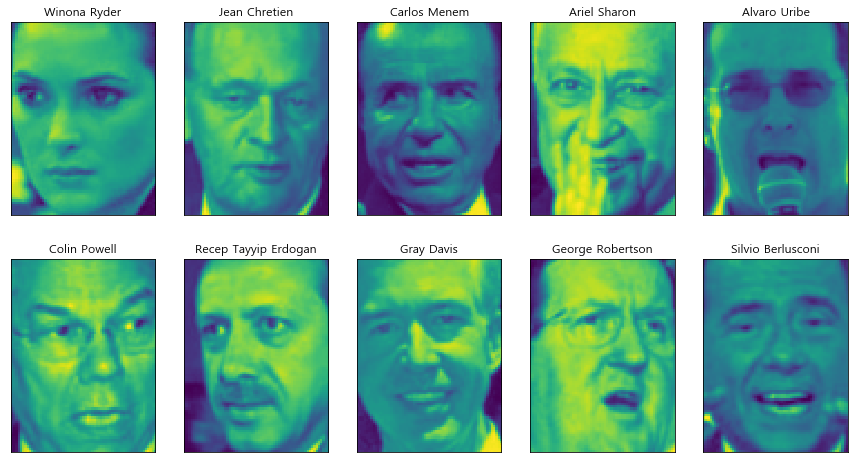

In [13]:
from sklearn.datasets import fetch_lfw_people
people =fetch_lfw_people(min_faces_per_person = 20, resize =0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize = (15,8),
                       subplot_kw= {'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [14]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 같습니다
X_people = X_people /255.

Text(0, 0.5, 'nmf')

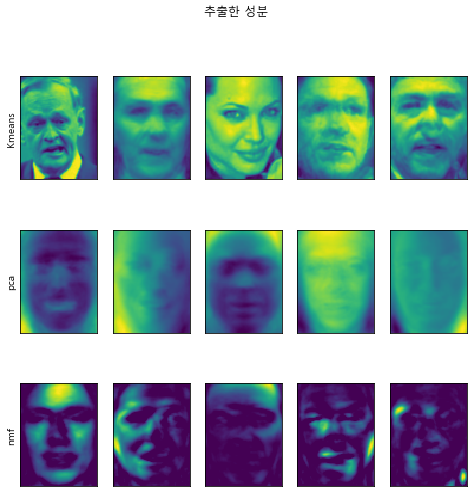

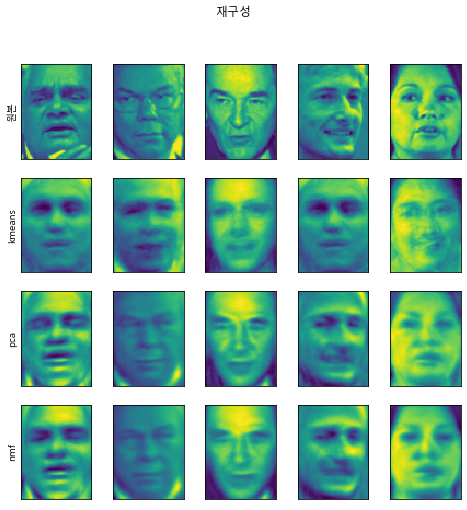

In [15]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state=42)
nmf = NMF(n_components =100, random_state =0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans= KMeans(n_clusters=100, random_state = 0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf. transform(X_test), nmf.components_)

fig, axes = plt.subplots(3,5, figsize= (8,8), subplot_kw = {'xticks': (), 'yticks': ()})
fig.suptitle('추출한 성분')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap = 'viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel('Kmeans')
axes[1,0].set_ylabel('pca')
axes[2,0].set_ylabel('nmf')
fig, axes = plt.subplots(4,5, subplot_kw = {'xticks': (), 'yticks': ()},
                        figsize= (8,8))
fig.suptitle('재구성')

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel('원본')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')

클러스터 레이블:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


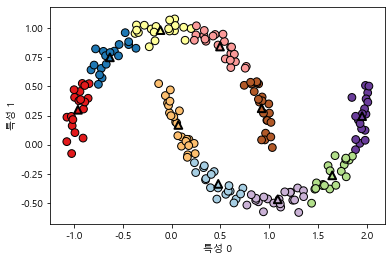

In [18]:
X,y = make_moons(n_samples=200, noise=0.05, random_state =0)
kmeans= KMeans(n_clusters =10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired', edgecolor='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60,
           marker='^', c= range(kmeans.n_clusters), linewidth=2, cmap='Paired',
           edgecolors = 'black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
print('클러스터 레이블:\n', y_pred)

In [19]:
distance_feature = kmeans.transform(X)
print('클러스터 거리 데이터의 형태:', distance_feature.shape)
print('클러스터 거리:\n', distance_feature)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### 3.5.2 병합 군집

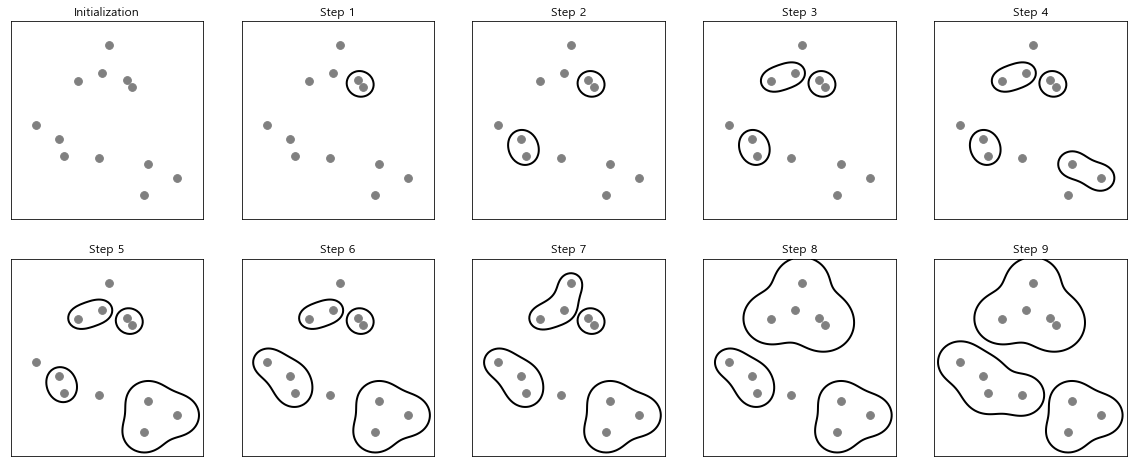

In [20]:
mglearn.plots.plot_agglomerative_algorithm()

In [21]:
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, '특성 1')

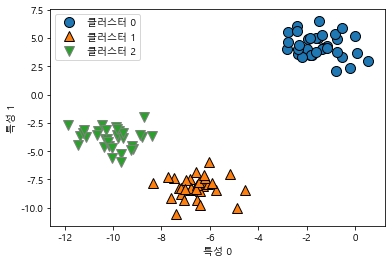

In [22]:
X, y = make_blobs(random_state =1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc = 'best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

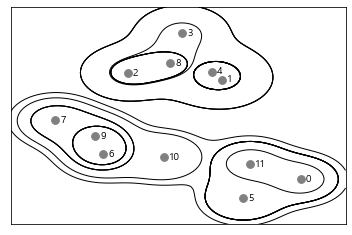

In [23]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, '클러스터 거리')

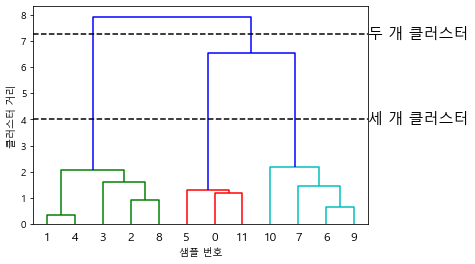

In [26]:
# Scipy에서 ward 군집 함수와 덴드로그램 함수를 임포트 한다.
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용한다.
# Scipy의 ward 함수는 병합 군집을 수행 할 대 생덩된 거리 정보가 담긴 배열을 반환한다.
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴트로그램을 그린다.
dendrogram(linkage_array)

# 두개와 세개의 클러스터를 구분하는 커트라인을표시한다.
ax =plt.gca()
bounds =ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c='k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va = 'center', fontdict = {'size':15})
ax.text(bounds[1], 4, '세 개 클러스터', va = 'center', fontdict = {'size':15})
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')

### 3.5.3 DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state = 0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('클러스터 레이블:\n', clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


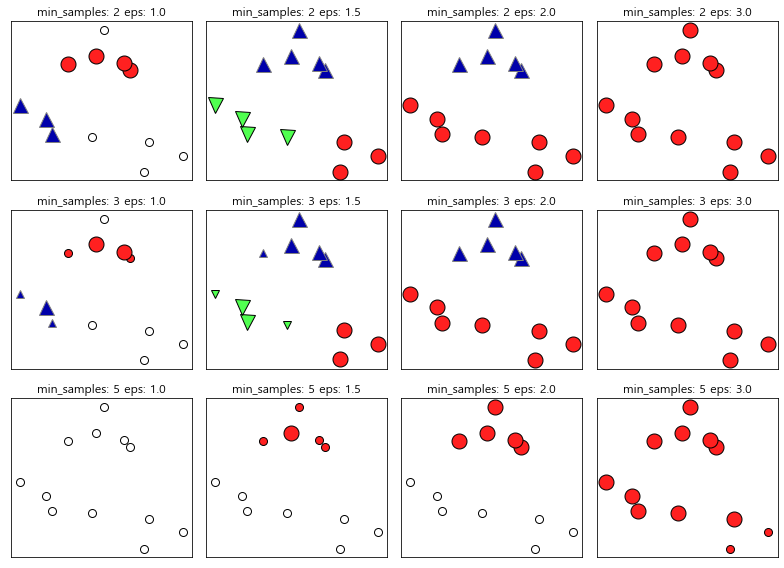

In [28]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, '특성 1')

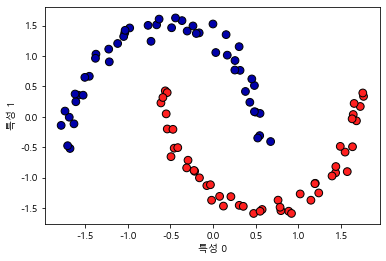

In [39]:
X,y = make_moons(n_samples=100, noise = 0.05, random_state=0)
#평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)

dbscan= DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시한다.
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

### 3.5.4 군집 알고리즘의 비교와 평가

In [43]:
from sklearn.metrics.cluster import adjusted_rand_score
X,y= make_moons(n_samples = 200, noise=0.05, random_state =0)

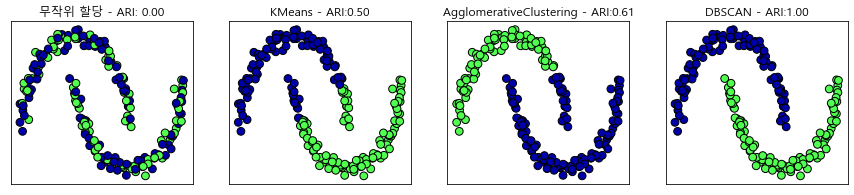

In [50]:
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled =scaler.transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks':()})

#사용할 알고리즘 모델을 리스트로 만듭니다.
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

#비교를 위해 무작위로 클러스터를 할당한다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size= len(X))

# 무작위 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:,1], c= random_clusters,
               cmap = mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI: {:.2f}'. format(
    adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    #클러스터 할당과 클러스터 중심을 그린다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c = clusters,
              cmap= mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} - ARI:{:.2f}'.format(algorithm.__class__.__name__,
                                         adjusted_rand_score(y, clusters)))

In [52]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]
# 모든 레이블이 달라졌으므로 정확도는 0이다.
print('정확도:{:.2f}'.format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모엿으므로 ARI는 1이다.
print('ARI: {:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

정확도:0.00
ARI: 1.00


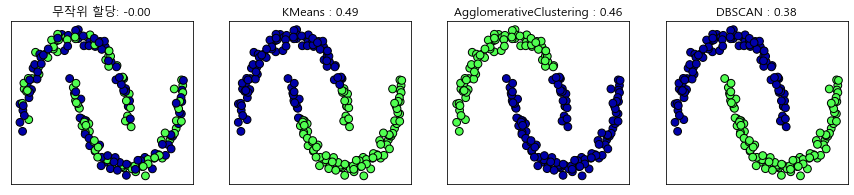

In [57]:
from sklearn.metrics.cluster import silhouette_score

X,y = make_moons(n_samples =200, noise=0.05, random_state =0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정한다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig,axes = plt.subplots(1,4, figsize=(15,3),
                       subplot_kw={'xticks': (), 'yticks': ()})
# 비교를 위해 무작위로 클러스터 할당한다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low = 0, high=2, size= len(X))

# 무작위 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c= random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당: {:.2f}'.format(
    silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    #클러스터 할당과 클러스터 중심을 그린다.
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c= clusters, cmap = mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} : {:.2f}'.format(algorithm.__class__.__name__,
                                     silhouette_score(X_scaled, clusters)))

In [58]:
# LFW 데이터에서 고유얼굴을 찾은 다음 데이터를 변환한다
from sklearn.decomposition import PCA
pca = PCA(n_components =100, whiten = True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [61]:
#기본 매개변수로 DBSCAN을 적용한다.
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('고유한 레이블:', np.unique(labels))

고유한 레이블: [-1]


In [62]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('고유한 레이블:', np.unique(labels))

고유한 레이블: [-1]


In [64]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('고유한 레이블:', np.unique(labels))

고유한 레이블: [-1  0]


In [65]:
# 잡음 포인트와 클러스터에 속한 포인트 수를 센다
# bincount 는 음수를 받을 수 없어서 label 에 1을 더한다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수이다.
print('클러스터별 포인트 수:', np.bincount(labels+1))


클러스터별 포인트 수: [  32 2031]


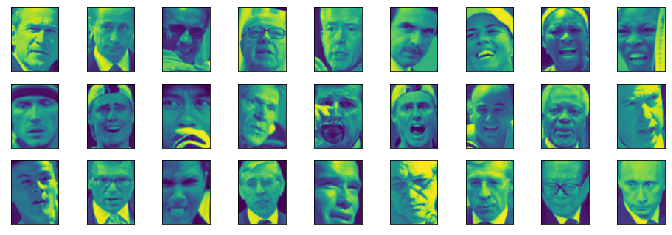

In [68]:
noise = X_people[labels==-1]

fig,axes = plt.subplots(3, 9, subplot_kw = {'xticks': (), 'yticks': ()},
                       figsize=(12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [73]:
for eps in [1,3,5,7,9,11,13]:
    print('\neps=', eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print('클래스터 수:', len(np.unique(labels)))
    print('클래스터 크기:', np.bincount(labels+1))


eps= 1
클래스터 수: 1
클래스터 크기: [2063]

eps= 3
클래스터 수: 1
클래스터 크기: [2063]

eps= 5
클래스터 수: 1
클래스터 크기: [2063]

eps= 7
클래스터 수: 14
클래스터 크기: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps= 9
클래스터 수: 4
클래스터 크기: [1307  750    3    3]

eps= 11
클래스터 수: 2
클래스터 크기: [ 413 1650]

eps= 13
클래스터 수: 2
클래스터 크기: [ 120 1943]


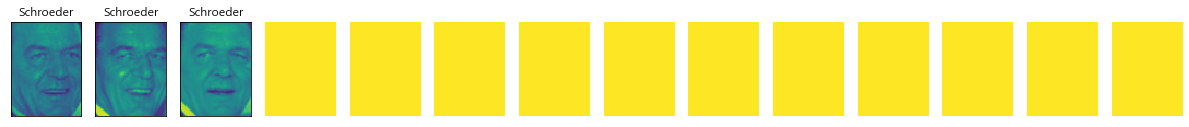

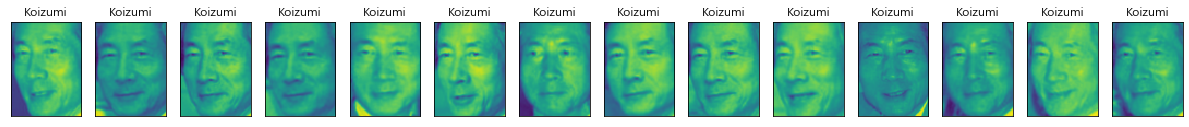

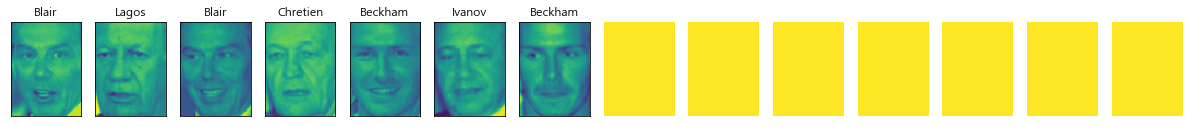

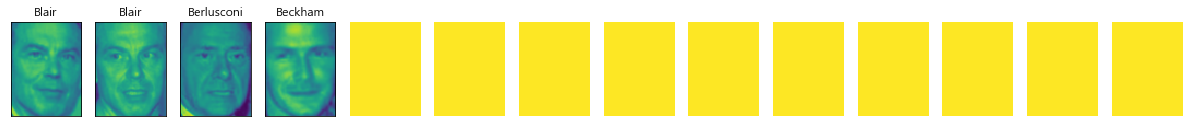

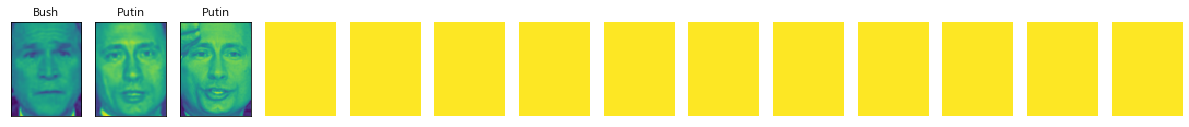

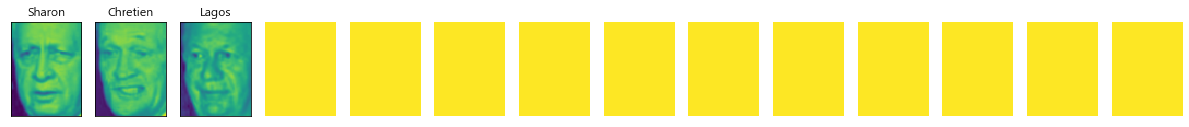

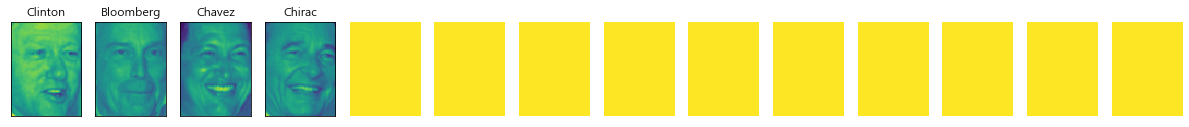

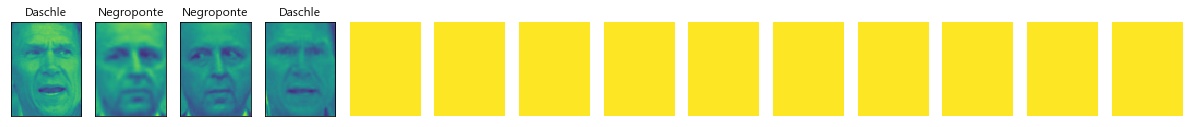

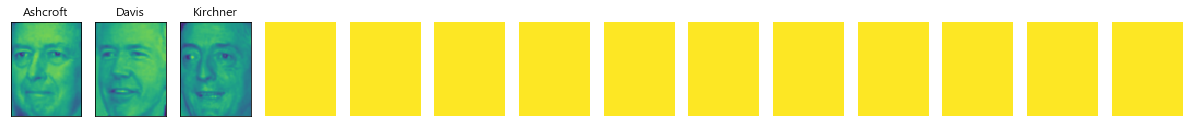

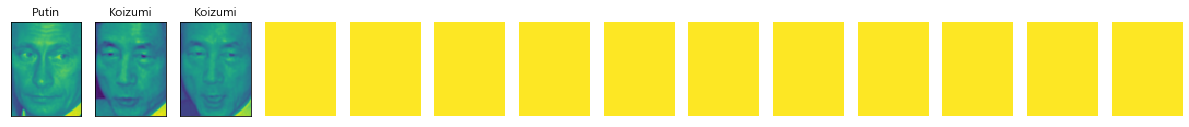

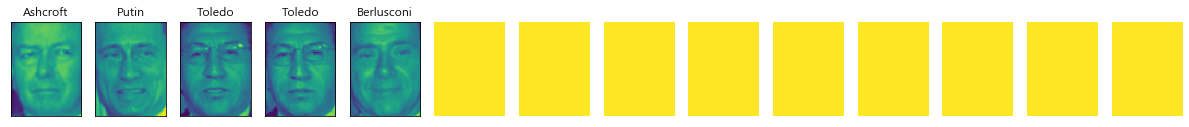

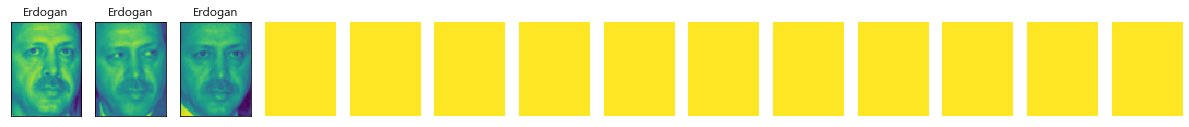

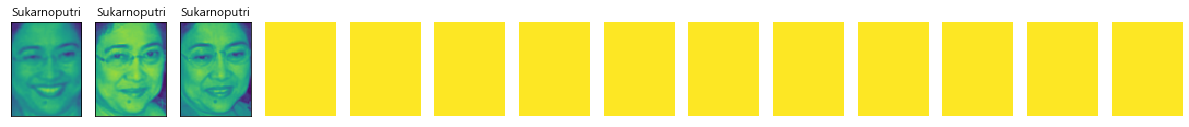

In [74]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels ==cluster
    n_images = np.sum(mask)
    fig,axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                           subplot_kw={'xticks': (), 'yticks': ()})
    
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i +=1
    for j in range(len(axes) -i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

In [75]:
# k - 평균으로 클러스터를 추출한다.
km = KMeans(n_clusters= n_clusters, random_state = 0)
labels_km = km.fit_predict(X_pca)
print('k-평균의 클러스터 크기:', np.bincount(labels_km))

NameError: name 'n_clusters' is not defined